# Nivell 1
## - Exercici 1

Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

- Una variable categòrica (UniqueCarrier)
- Una variable numèrica (ArrDelay)
- Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
- Dues variables numèriques (ArrDelay i DepDelay)
- Tres variables (ArrDelay, DepDelay i UniqueCarrier)
- Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

df= pd.read_csv('data/DelayedFlights.csv',header=0)
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


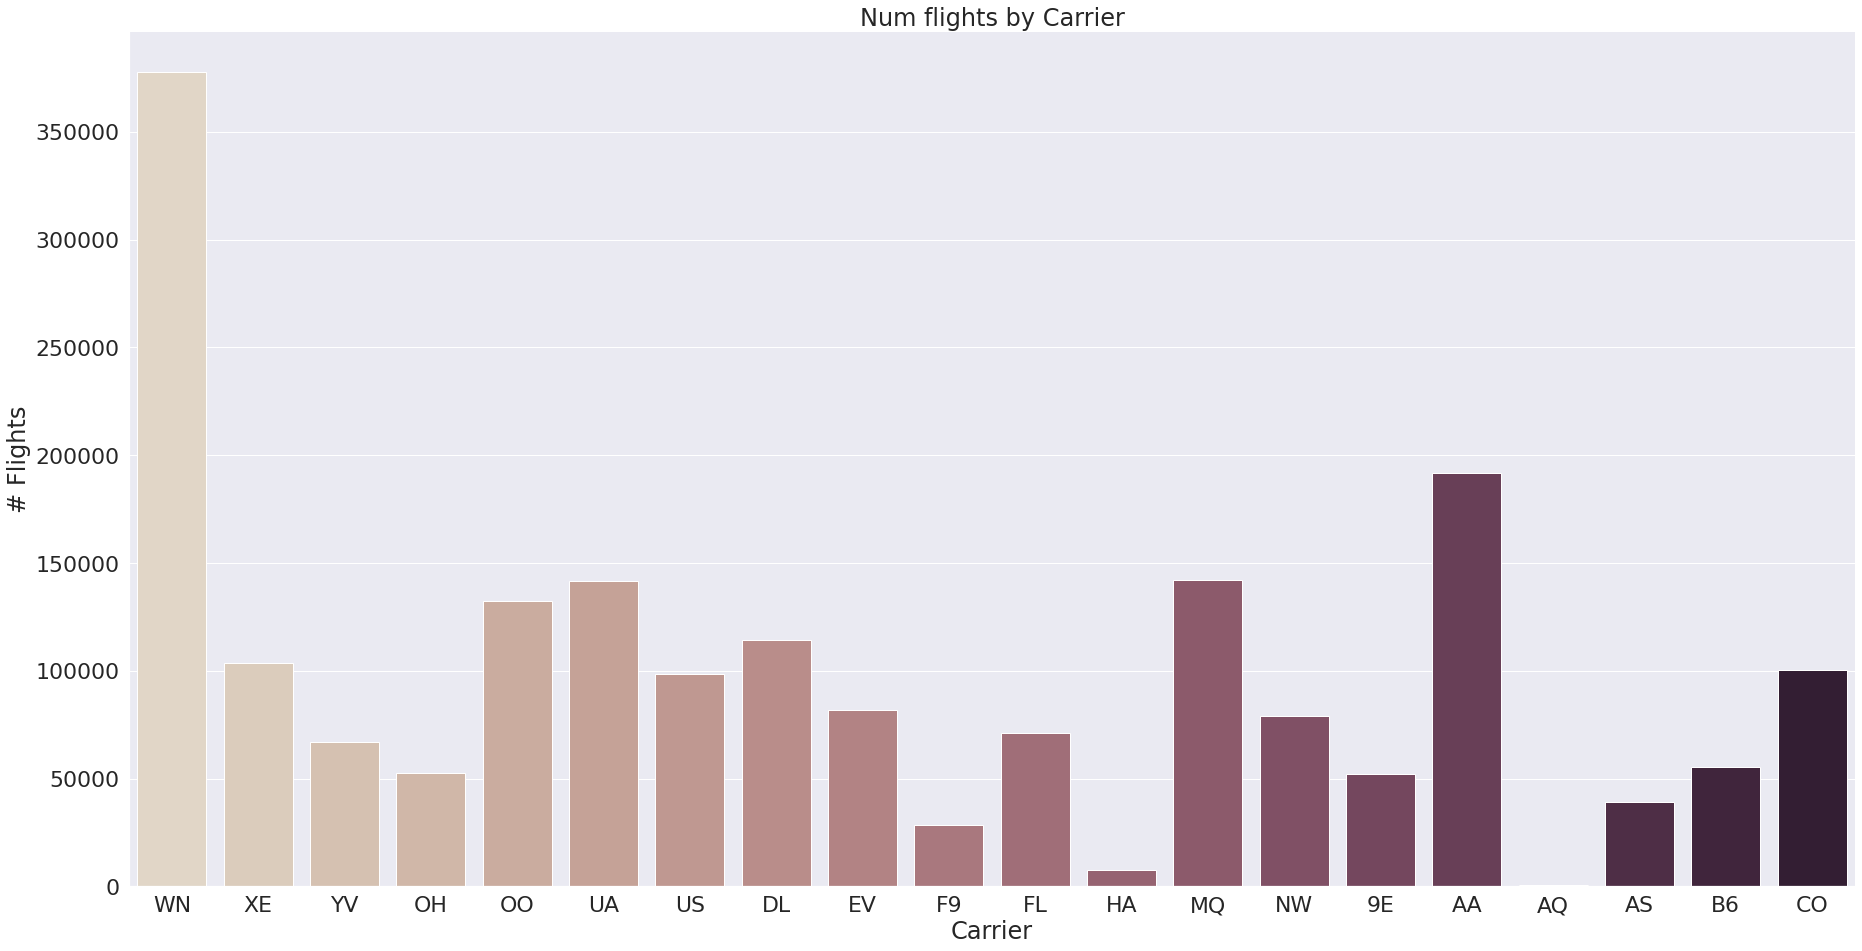

In [2]:
sns.set(font_scale = 2)
cat=sns.catplot(x="UniqueCarrier", kind="count", palette="ch:.25", data=df, height=13, aspect=2)
cat.set(title="Num flights by Carrier")
cat.set_xlabels("Carrier")
cat.set_ylabels("# Flights")

Representacio d'una variable numerica

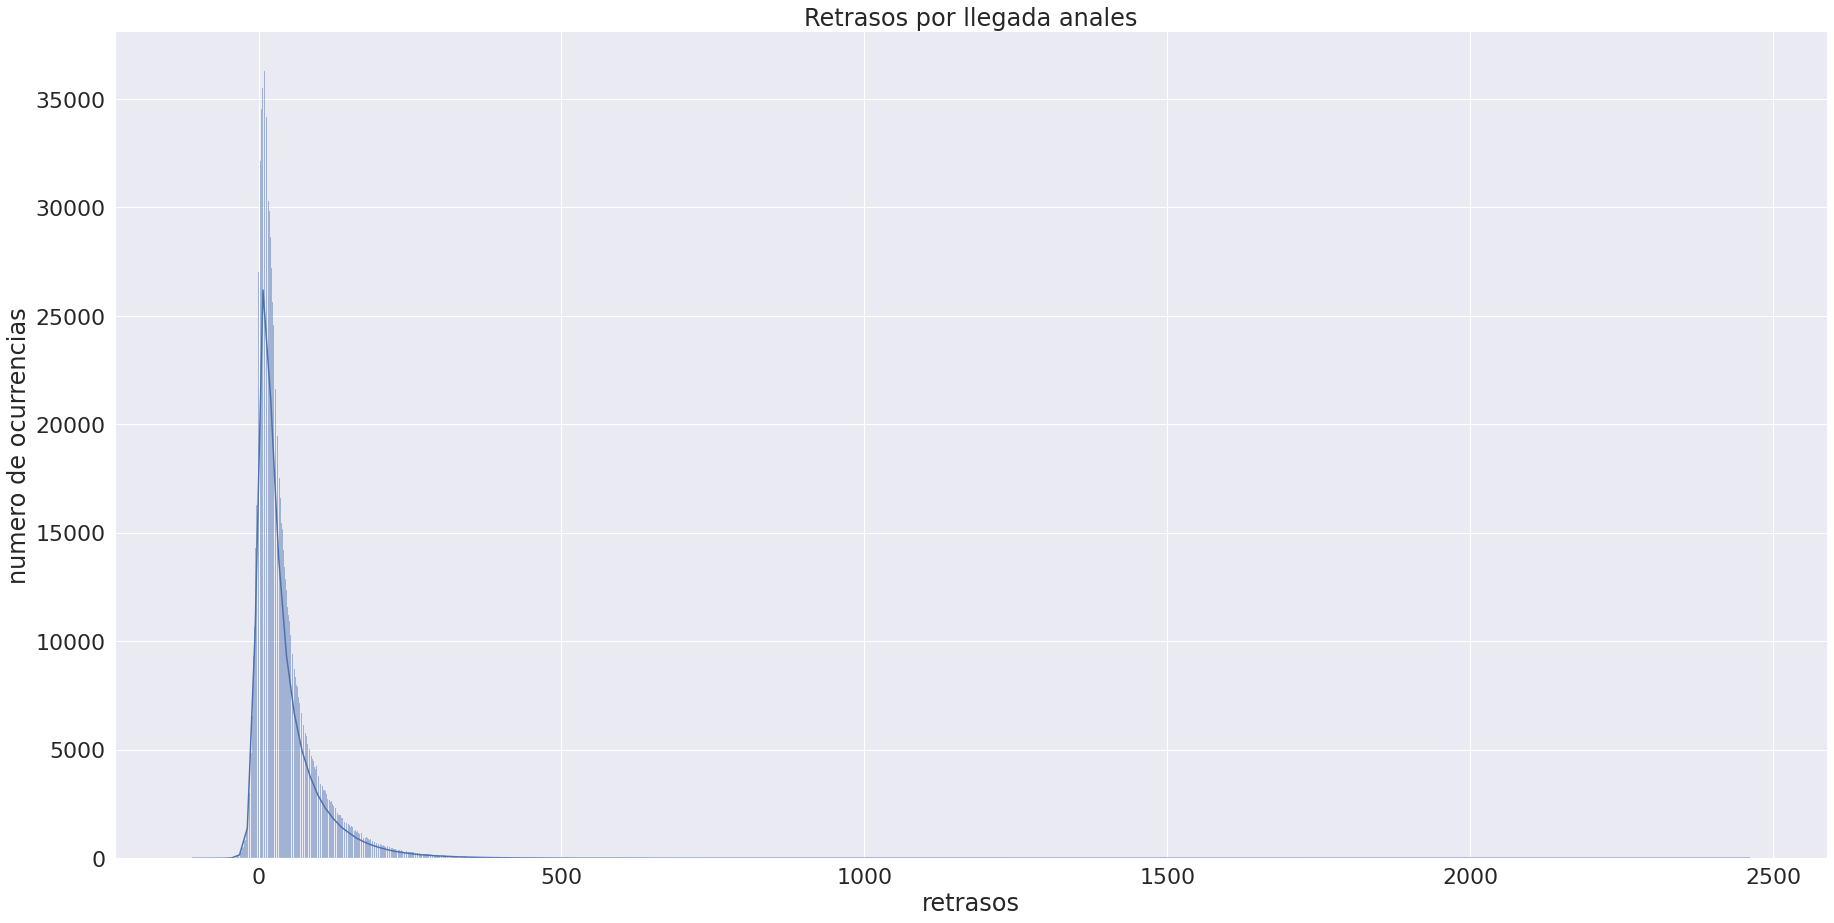

In [3]:
one=sns.displot(df, x="ArrDelay", kde=True, height=13, aspect=2)
one.set(title="Retrasos por llegada anales")
one.set_xlabels("retrasos")
one.set_ylabels("numero de ocurrencias")

Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

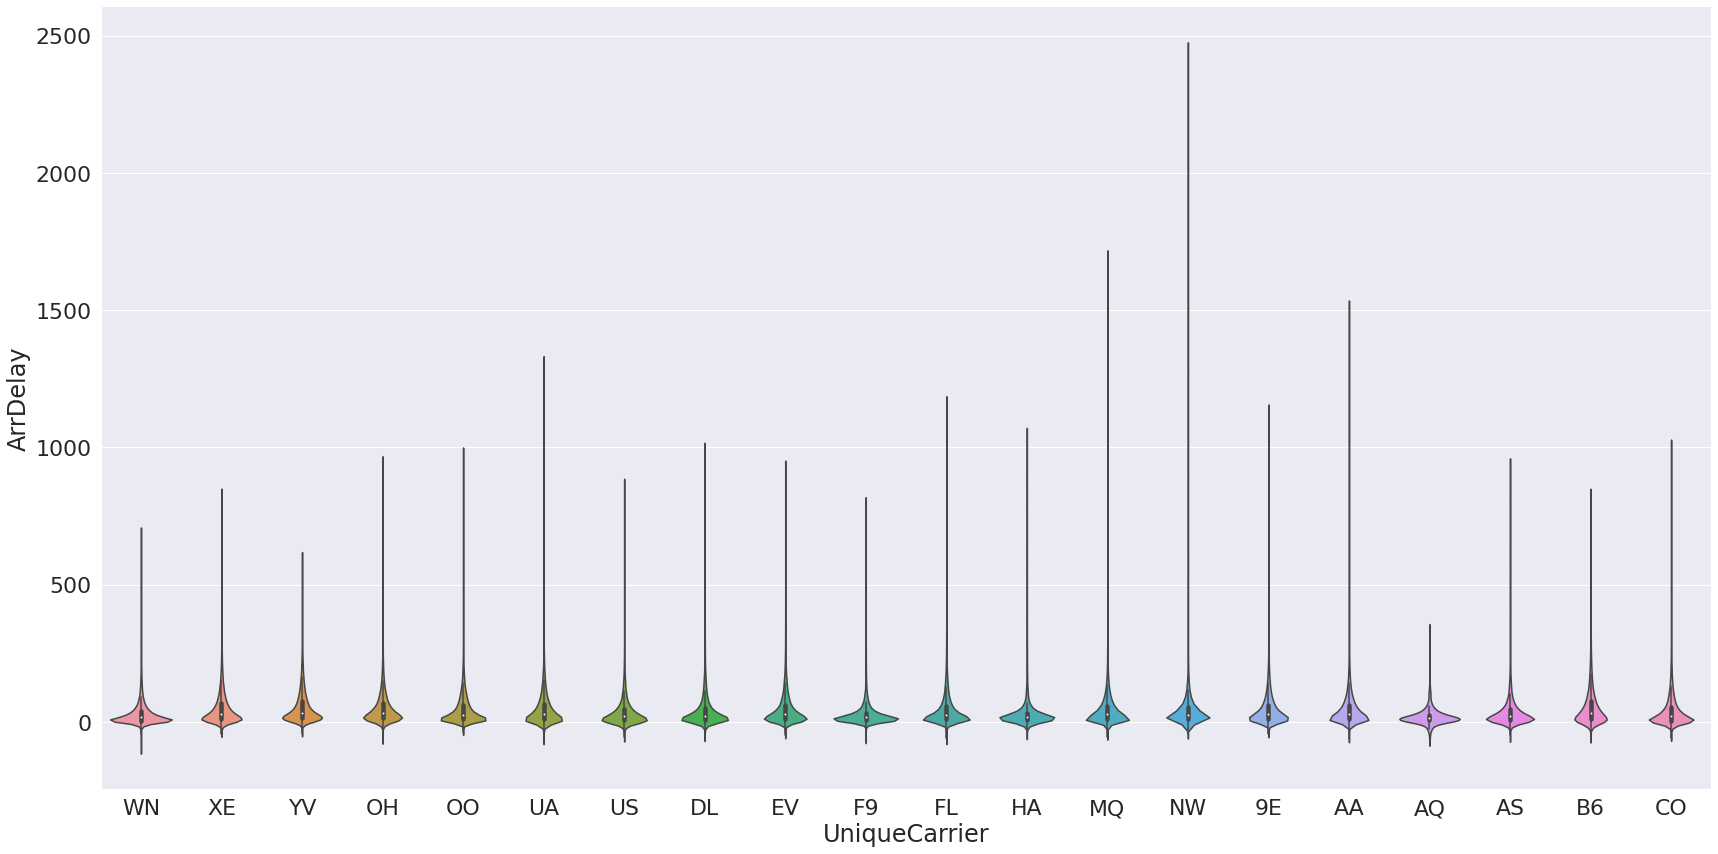

In [4]:
cat_num=sns.catplot(kind = 'violin', x = 'UniqueCarrier', y = 'ArrDelay',  data = df,height = 12, aspect = 2)

Dues variables numèriques (ArrDelay i DepDelay)


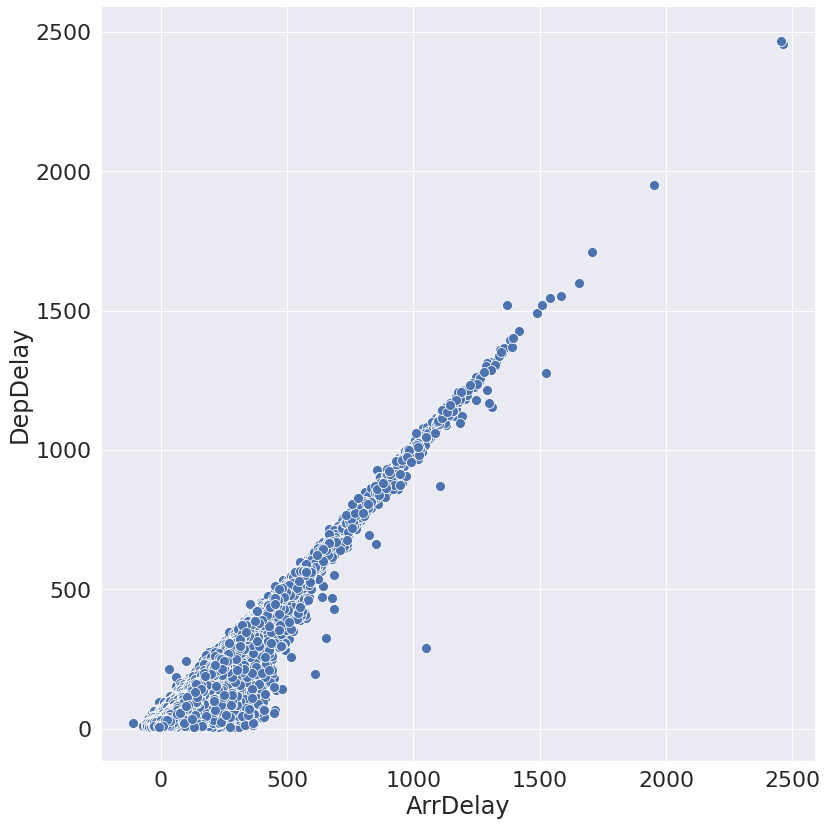

In [5]:
num_num = sns.FacetGrid(df, height=12)
num_num.map(sns.scatterplot, "ArrDelay","DepDelay", s=100) 



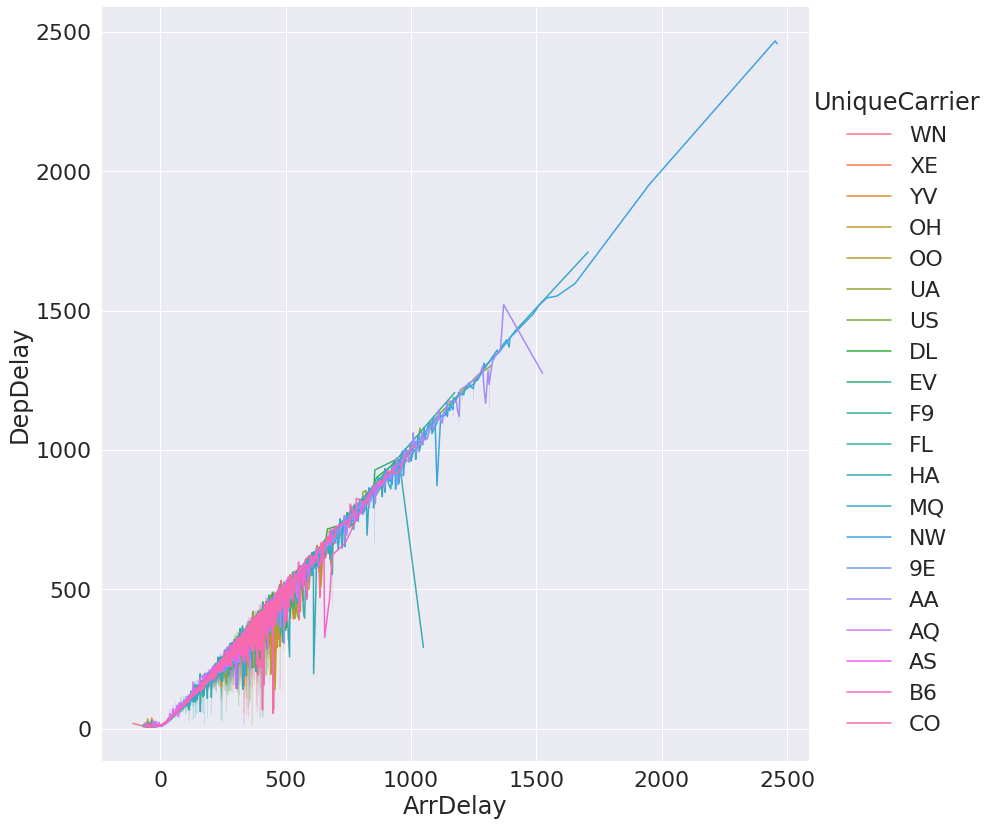

In [6]:
three= sns.FacetGrid(df, height=12,hue="UniqueCarrier")
three.map(sns.lineplot, "ArrDelay","DepDelay") 
three.add_legend()

Tres variables (ArrDelay, DepDelay i UniqueCarrier)


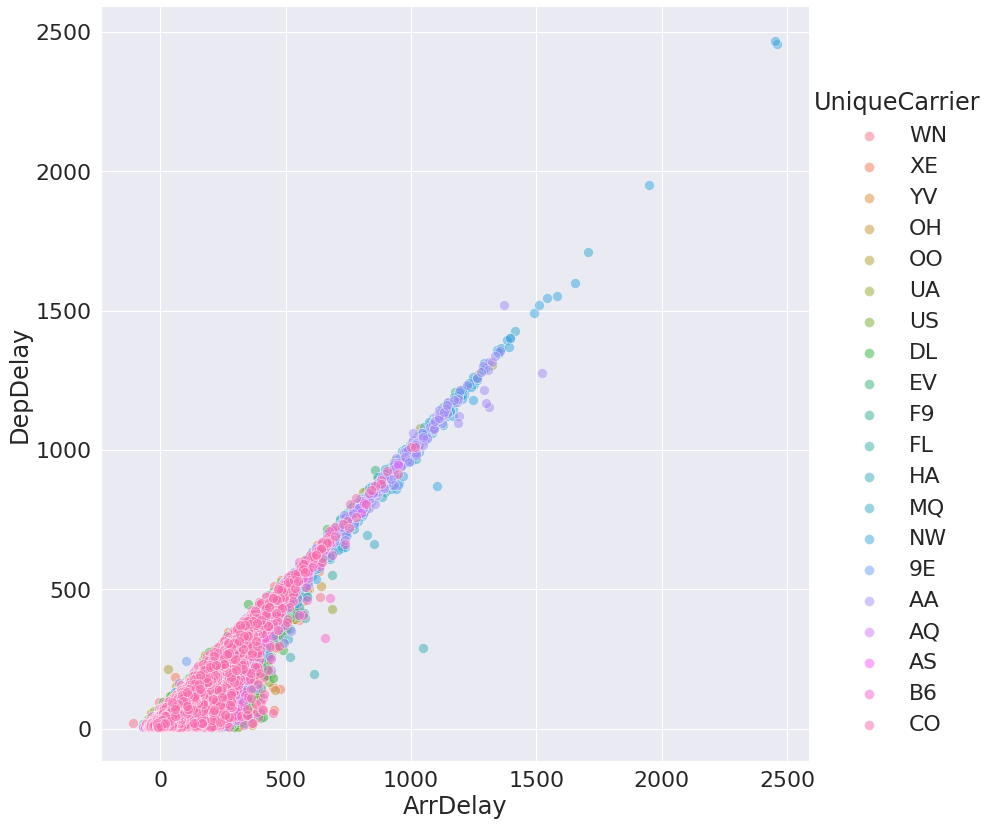

In [7]:
three2 = sns.FacetGrid(df, hue="UniqueCarrier", height=12)
three2.map(sns.scatterplot, "ArrDelay", "DepDelay", s=100, alpha=.5)
three2.add_legend()

- Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

<AxesSubplot:xlabel='ArrDelay', ylabel='DepDelay'>

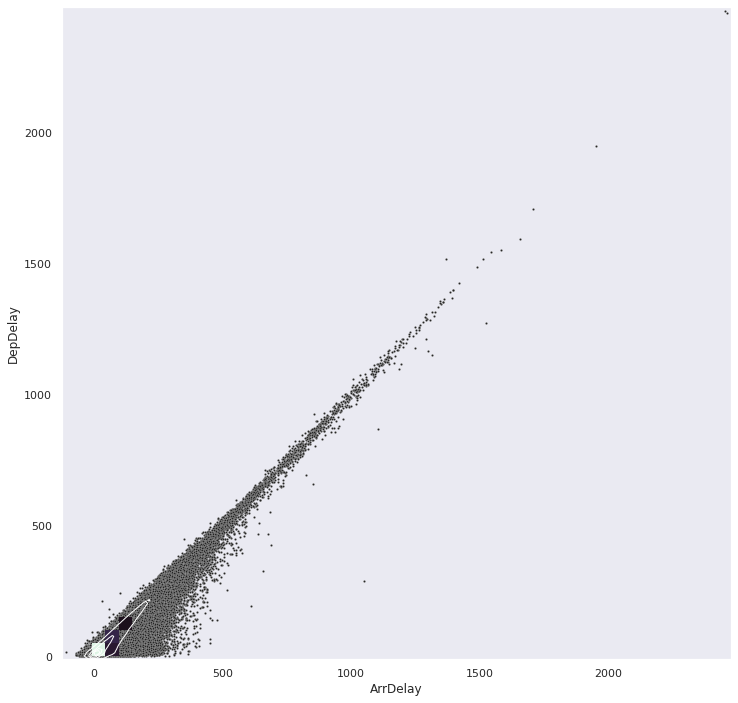

In [8]:
sns.set_theme(style="dark")
f, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(x=df.ArrDelay, y=df.DepDelay, s=5, color=".15")
sns.histplot(x=df.ArrDelay, y=df.DepDelay, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=df.ArrDelay, y=df.DepDelay, levels=5, color="w", linewidths=1)

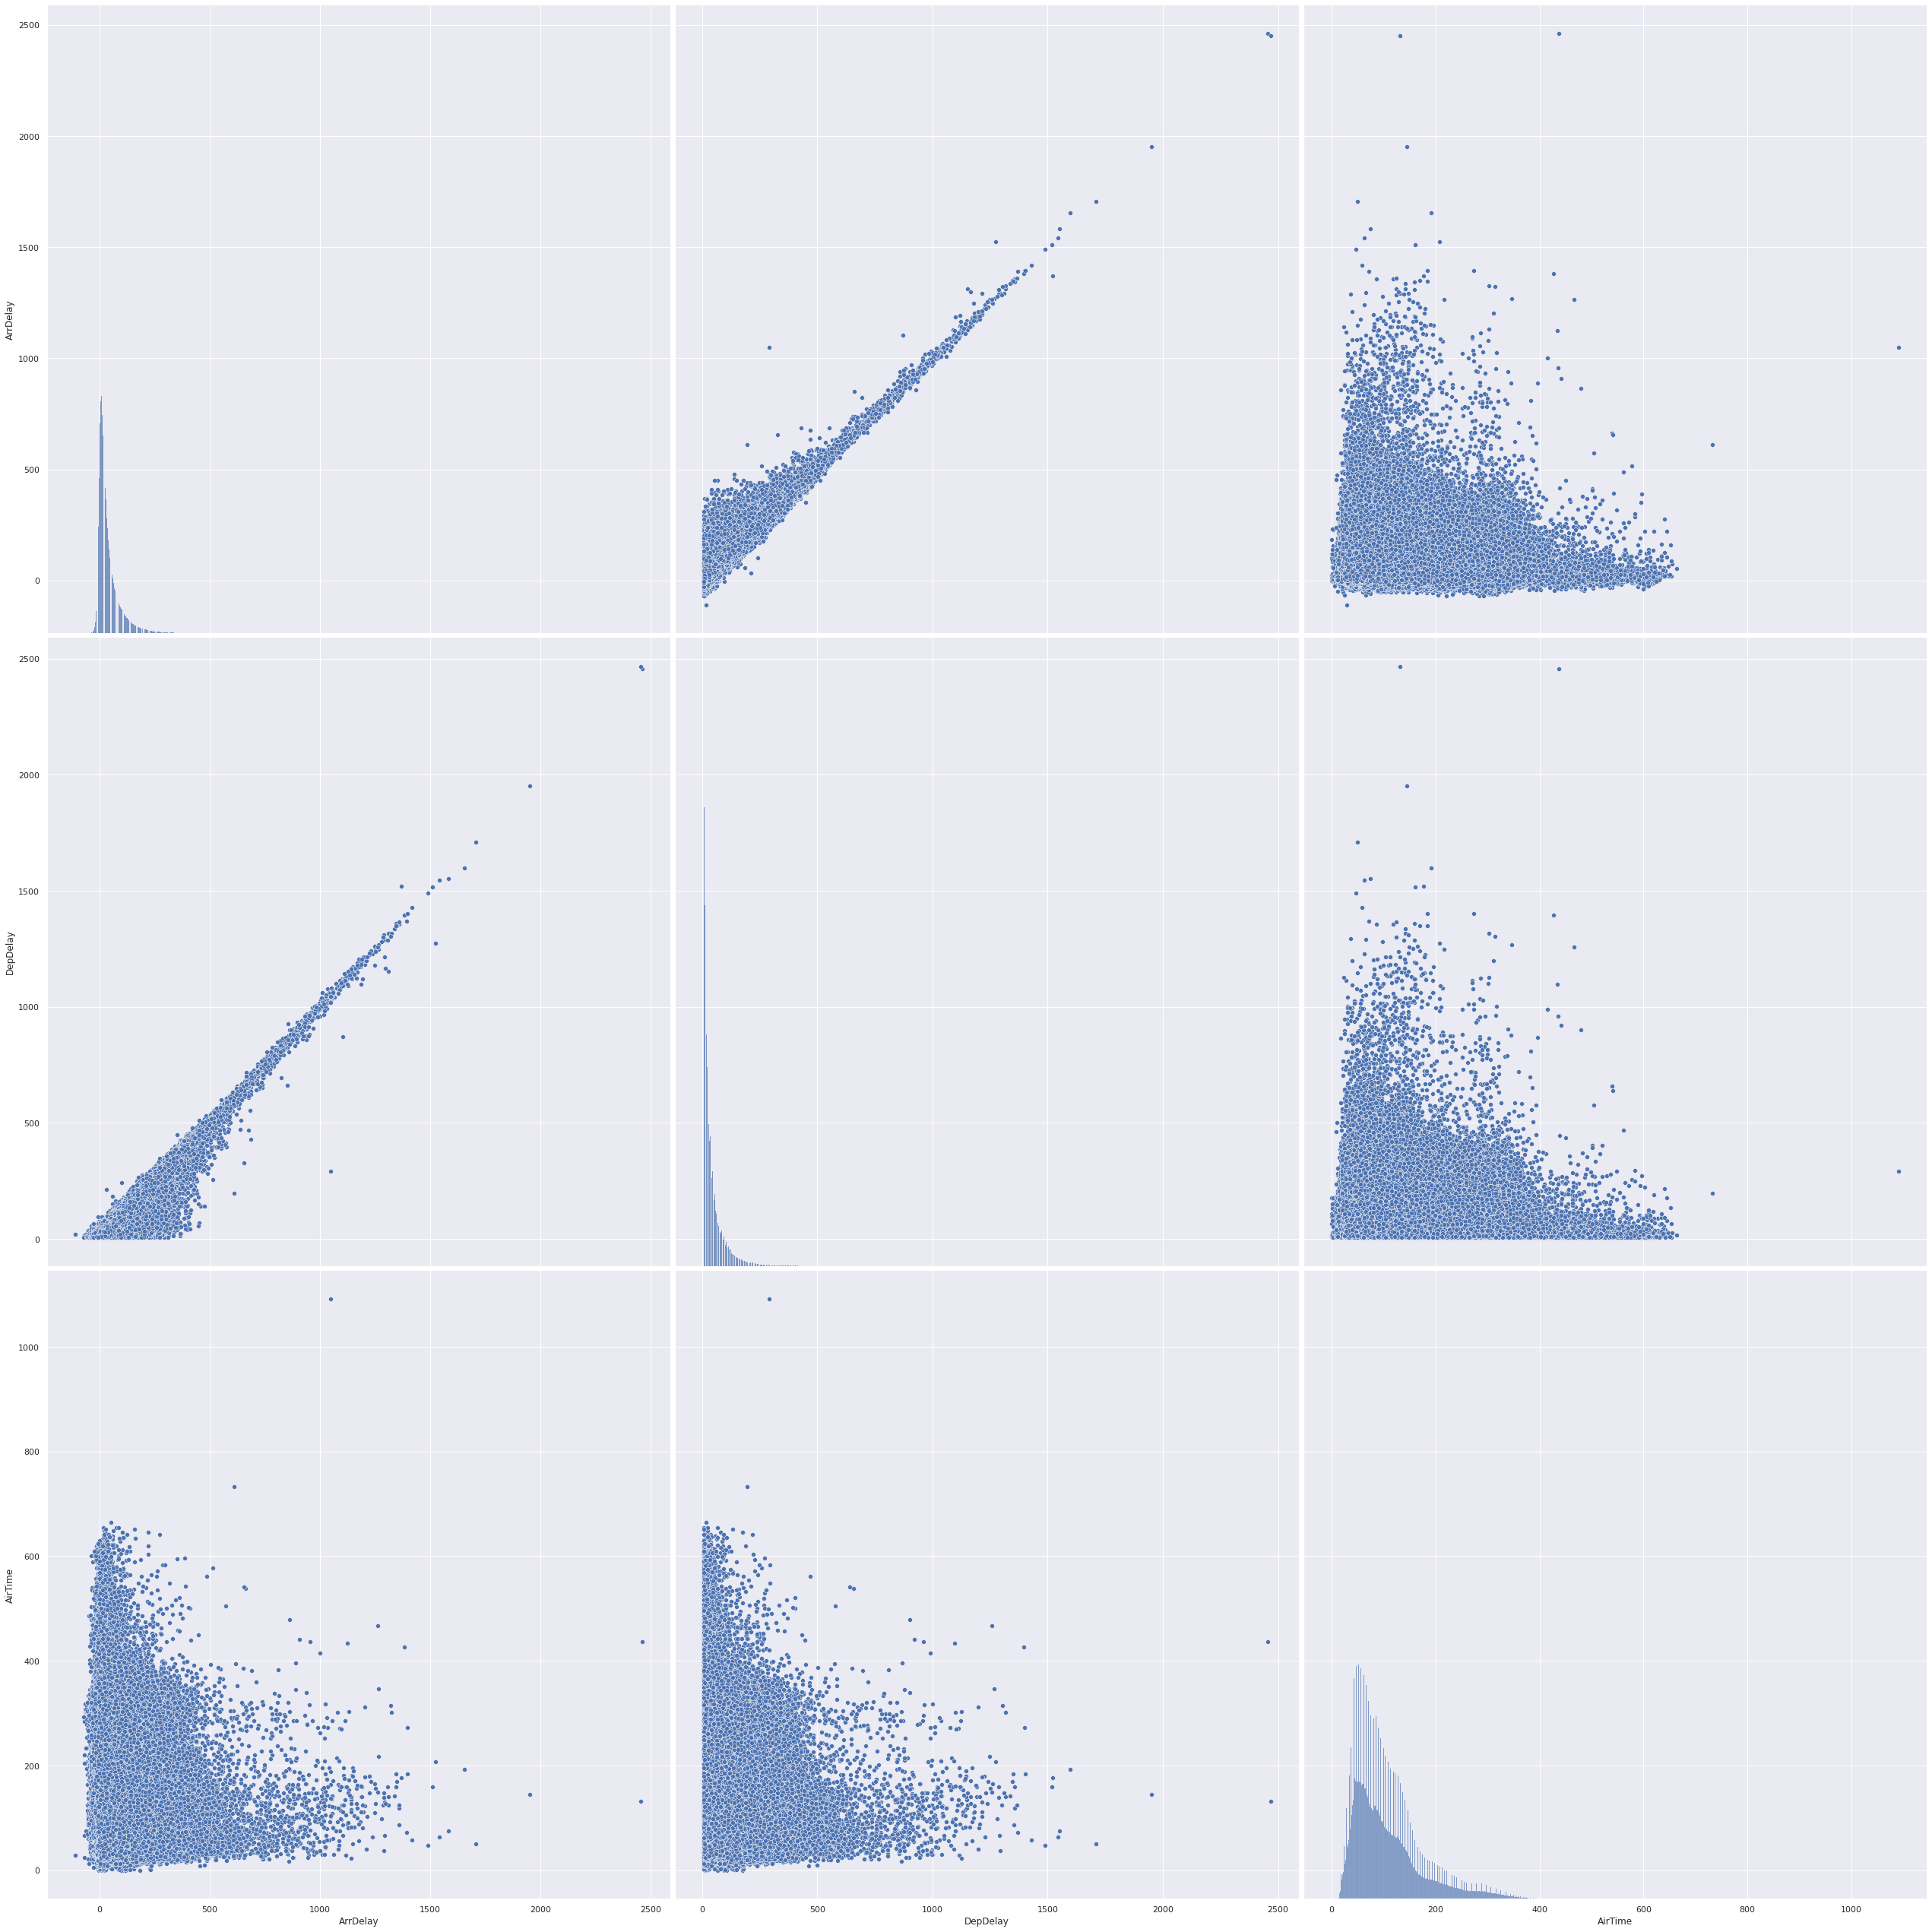

In [9]:
four_set=sns.set()
cols = ['ArrDelay', 'DepDelay', 'AirTime', 'UniqueCarrier']
four=sns.pairplot(df[cols], height = 12)
plt.show()

## - Exercici 2
Exporta els gràfics com imatges o com html.

In [10]:
cat.savefig("pics/categorical.png")
one.savefig("pics/onevar.png")
cat_num.savefig("pics/categoricalAndNumerical.png")
num_num.savefig("pics/numericalNumerical")
three2.savefig("pics/ThreVariables")
four.savefig("pics/fourVariables")

## - Exercici 3
Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.

# Nivell 1
## - Exercici 1
Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.


In [11]:

df.columns


Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Definicio dels camps
1. **Year** -> any de la dada format yyyy
2. **Month** -> mes de la dada format mm
3. **DayofMonth** -> dia del mes 1-31
4. **DayOfWeek** -> dia de la setmana  1 (Monday) - 7 (Sunday)
5. **DepTime** -> hora de sortida  (local, hhmm)
6. **CRSDepTime**  -> hora programada de sortida (local, hhmm)
7. **ArrTime** -> hora de arrivada (local, hhmm)
8. **CRSArrTime**  -> hora programda de arrivada (local, hhmm)
9.  **UniqueCarrier** -> identificador del operador
10. **FlightNum** -> numero de vol
11. **TailNum** -> matricula del avio
12. **ActualElapsedTime** -> temps de vol total en minuts
13. **CRSElapsedTime** -> temps estimat de vol total en minutos 
14. **AirTime**  -> temps en el aire en minuts 
15. **ArrDelay** -> Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers, in minutes
16. **DepDelay** -> Difference in minutes between scheduled and actual departure time.Early departures show negative numbers, in minutes
17. **Origin**   -> codi IATA areoport de origen
18. **Dest** -> codi IATA aeroport de dest
19. **Distance** -> distancia entre aeroports (miles)
20. **TaxiIn** -> Wheels down and arrival at the destination airport gate, in minutes
21. **TaxiOut** -> The time elapsed between departure from the origin airport gate and wheels off, in minutes
22. **Cancelled** -> vol cancelat o no
23. **CancellationCode** -> motiu de la cancelacio (A = carrier, B = weather, C = NAS, D = security)
24. **Diverted** -> Desviat 1 = yes, 0 = no
25. **CarrierDelay** ->  Retràs degut a l'operador  in minutes
26. **WeatherDelay** ->  Retràs degut al temps  in minutes
27. **NASDelay** ->  Retràs degut a NAS in minutes
28. **SecurityDelay** ->  Retràs degut motius de seguretat  in minutes
29. **LateAircraftDelay**  -> Retràs acumulat de l'avió  in minutes

In [12]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [13]:
df.info(verbose=True,show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1936758 non-null  int64  
 1   Year               1936758 non-null  int64  
 2   Month              1936758 non-null  int64  
 3   DayofMonth         1936758 non-null  int64  
 4   DayOfWeek          1936758 non-null  int64  
 5   DepTime            1936758 non-null  float64
 6   CRSDepTime         1936758 non-null  int64  
 7   ArrTime            1929648 non-null  float64
 8   CRSArrTime         1936758 non-null  int64  
 9   UniqueCarrier      1936758 non-null  object 
 10  FlightNum          1936758 non-null  int64  
 11  TailNum            1936753 non-null  object 
 12  ActualElapsedTime  1928371 non-null  float64
 13  CRSElapsedTime     1936560 non-null  float64
 14  AirTime            1928371 non-null  float64
 15  ArrDelay           1928371 non-n

In [14]:
df.count().sort_values()

LateAircraftDelay    1247488
NASDelay             1247488
WeatherDelay         1247488
CarrierDelay         1247488
SecurityDelay        1247488
ArrDelay             1928371
ActualElapsedTime    1928371
AirTime              1928371
ArrTime              1929648
TaxiIn               1929648
TaxiOut              1936303
CRSElapsedTime       1936560
TailNum              1936753
CRSArrTime           1936758
Year                 1936758
Month                1936758
DayofMonth           1936758
Diverted             1936758
CancellationCode     1936758
Cancelled            1936758
Dest                 1936758
Origin               1936758
DepDelay             1936758
DayOfWeek            1936758
DepTime              1936758
CRSDepTime           1936758
FlightNum            1936758
UniqueCarrier        1936758
Distance             1936758
Unnamed: 0           1936758
dtype: int64

Vemos que  la cantidad de valores de las 5 primeras columnas es inferior al total, por lo que implica valores NaN

In [15]:
df.drop(df.columns.difference(['ArrDelay', 'FlightNum', 'UniqueCarrier', 'AirTime',  'Distance','Origin','Dest', 'Year', 'Month', 'DayofMonth','ArrTime','DepTime' ]),axis=1,  inplace=True)

## - Exercici 2
Fes un informe complet del data set:.
Resumeix estadísticament les columnes d’interès Troba quantes dades faltants hi ha per columna Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
Taula de les aerolínies amb més endarreriments acumulats Quins són els vols més llargs? I els més endarrerits?
Etc.

Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)

In [16]:
df['Date'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')
df.dropna(subset=["Distance","AirTime"],inplace=True)
df['AvgSpeed'] = round(60*df.Distance/df.AirTime,2) # milles per hora
df['Delayed'] = df.ArrDelay >0

In [17]:
df.head()

,Year,Month,DayofMonth,DepTime,ArrTime,UniqueCarrier,FlightNum,AirTime,ArrDelay,Origin,Dest,Distance,Date,AvgSpeed,Delayed
0,2008,1,3,2003.0,2211.0,WN,335,116.0,-14.0,IAD,TPA,810,2008-01-03,418.97,False
1,2008,1,3,754.0,1002.0,WN,3231,113.0,2.0,IAD,TPA,810,2008-01-03,430.09,True
2,2008,1,3,628.0,804.0,WN,448,76.0,14.0,IND,BWI,515,2008-01-03,406.58,True
3,2008,1,3,1829.0,1959.0,WN,3920,77.0,34.0,IND,BWI,515,2008-01-03,401.30,True
4,2008,1,3,1940.0,2121.0,WN,378,87.0,11.0,IND,JAX,688,2008-01-03,474.48,True


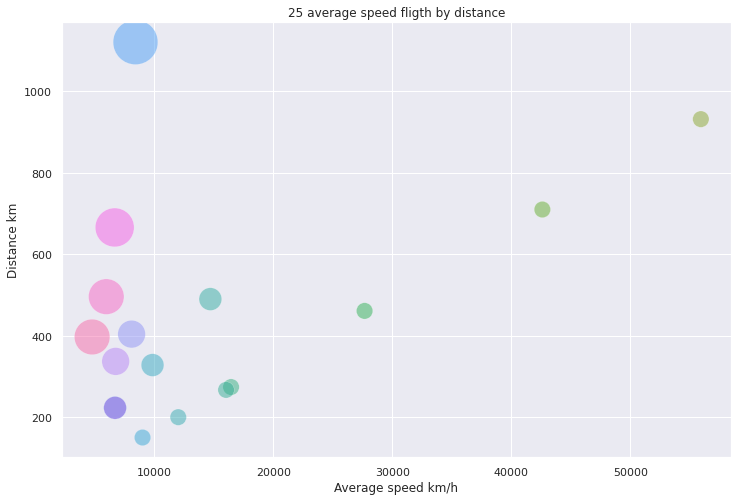

In [18]:

plt.rcParams['figure.figsize'] = [12, 8]
summary_speed=(df.sort_values('AvgSpeed',ascending = False).groupby('Origin')).head(10).head(25)
pltspeed=sns.scatterplot(data=summary_speed, x="AvgSpeed", y="Distance", hue="Origin",legend=False, size="AirTime",alpha=0.5, sizes=(20, 2000))
plt.title("25 average speed fligth by distance")
plt.xlabel("Average speed km/h")
plt.ylabel("Distance km")
plt.show()


Dades faltants  per columna

In [19]:
df[df.columns[df.isnull().sum(axis = 0)>0]].isnull().sum(axis=0)

Series([], dtype: float64)

Taula de les aerolínies 10 amb més endarreriments acumulats

In [20]:
carrier_delay=df.groupby(["UniqueCarrier"]).ArrDelay.sum().sort_values(ascending=False).head(10)
print(carrier_delay)
type(carrier_delay)

UniqueCarrier
WN    11319092.0
AA     8889066.0
UA     6733013.0
MQ     6396704.0
OO     5978936.0
XE     5176042.0
DL     4535644.0
CO     4045932.0
EV     3888131.0
YV     3691461.0
Name: ArrDelay, dtype: float64


pandas.core.series.Series

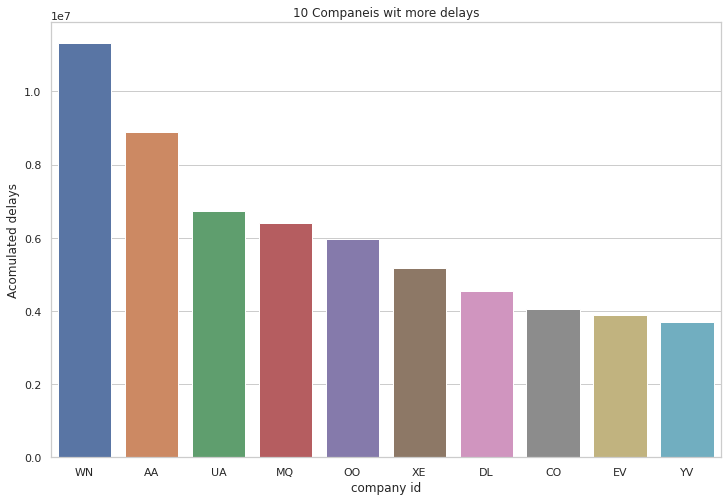

In [21]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid")
cat = sns.barplot(x=carrier_delay.index, y=carrier_delay.values)
plt.title("10 Companeis wit more delays")
plt.xlabel("company id")
plt.ylabel("Acomulated delays")
plt.show()


Quins són els vols més llargs en distancia

In [22]:
longFligths=df.sort_values(by="Distance",ascending=False).head(10)[['FlightNum','UniqueCarrier','Origin','Dest','Distance']]

Vols mes llargs per temps

In [23]:
df['totalTime']=df.ArrTime-df.DepTime
longflighbytime=df.sort_values(by="totalTime",ascending=False).head(10)[['FlightNum','UniqueCarrier','Origin','Dest','Distance','totalTime']]

Vols mes endarrerits

In [24]:
df.sort_values(by="ArrDelay",ascending=False).head(10)[['FlightNum','UniqueCarrier','Origin','Dest','ArrDelay']]

,FlightNum,UniqueCarrier,Origin,Dest,ArrDelay
322516,808,NW,HNL,MSP,2461.0
686014,1699,NW,CLT,MSP,2453.0
839306,1107,NW,RSW,DTW,1951.0
1009553,3538,MQ,LIT,DFW,1707.0
1881639,357,NW,BOS,MSP,1655.0
1497823,512,NW,OMA,MSP,1583.0
685437,1472,NW,MOT,MSP,1542.0
163379,2398,AA,EGE,MIA,1525.0
1214839,804,NW,SEA,MSP,1510.0
521096,1743,NW,BNA,MEM,1490.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]),
 [Text(0, 0, '9'),
  Text(1, 0, '17'),
  Text(2, 0, '19'),
  Text(3, 0, '21'),
  Text(4, 0, '23'),
  Text(5, 0, '26'),
  Text(6, 0, '29'),
  Text(7, 0, '33'),
  Text(8, 0, '37'),
  Text(9, 0, '51'),
  Text(10, 0, '73'),
  Text(11, 0, '85'),
  Text(12, 0, '89'),
  Text(13, 0, '95'),
  Text(14, 0, '107'),
  Text(15, 0, '119'),
  Text(16, 0, '137'),
  Text(17, 0, '151'),
  Text(18, 0, '177'),
  Text(19, 0, '195'),
  Text(20, 0, '217'),
  Text(21, 0, '220'),
  Text(22, 0, '228'),
  Text(23, 0, '371'),
  Text(24, 0, '426'),
  Text(25, 0, '441'),
  Text(26, 0, '467'),
  Text(27, 0, '483'),
  Text(28, 0, '485'),
  Text(29, 0, '518'),
  Text(30, 0, '531'),
  Text(31, 0, '63

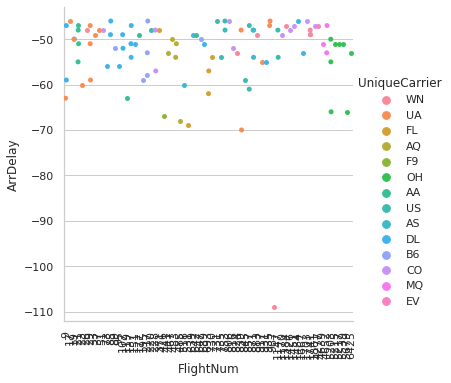

In [30]:
plt.rcParams['figure.figsize'] = [29, 12]
data=df.sort_values(by='ArrDelay').head(100)
sns.catplot(y="ArrDelay", x="FlightNum", hue="UniqueCarrier", data=data )
plt.xticks(rotation='vertical')


## - Exercici 3
Exporta el data set net i amb les noves columnes a Excel.

In [26]:
!pip install XlsxWriter

Defaulting to user installation because normal site-packages is not writeable


In [27]:
#Elimninem les files incomplertes i els valors de la data que ja hem incorporat en el camp
df.dropna(axis=0,inplace=True)
df.drop(columns=["Year","Month","DayofMonth"],axis=1)
#Dividim el df en dos fulls ja que el execel nomes accepte 1048576 registres per full
df1 = pd.DataFrame(df[0:1048576])
df2 = pd.DataFrame(df[1048576:])
writer = pd.ExcelWriter('Delays.xlsx', engine='xlsxwriter')
df1.to_excel(writer,sheet_name='Sheet1')
df2.to_excel(writer,sheet_name='Sheet2')
writer.save()